In [1]:
#allows drawing digrams in jupyeter notebooks
%matplotlib inline
#loading tensorboard
%load_ext tensorboard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#specific tensorflow libraries
import tensorflow as tf
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
import datetime

In [4]:
from pandas.plotting import scatter_matrix

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
def Train_Test_XY_normalize_PCA(TrainX, TrainY, PCA_n = None):
    
    # normalize data
    scaler_new = StandardScaler()
    scaler_new.fit(TrainX)
    X_train_scale = scaler_new.transform(TrainX)
    print(f'X shape {X_train_scale.shape}')
    
    if PCA_n != None:
        # dimension reduction
        TrainX_PCA = Train_Test_XY_PCA(X_train_scale, PCA_n = PCA_n)
        print(f'X shape {TrainX_PCA.shape}')
    
        # normalize again
        scaler_new = StandardScaler()
        scaler_new.fit(TrainX_PCA)
        X_train_scale = scaler_new.transform(TrainX_PCA)
        
    
    X_train, X_test, y_train, y_test = train_test_split(X_train_scale,TrainY,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=2020,
                                                       stratify=TrainY)
    
    
    return X_train, X_test, y_train, y_test

In [7]:
import tensorflow.keras.backend as Kb

# Write a custom loss function
def custom_loss(y_true, y_pred):
    binary_crossentropy = Kb.mean(Kb.binary_crossentropy(y_true, y_pred), axis = -1)
    prob_constraint = Kb.square(Kb.sum(y_pred, axis = -1)
                                - Kb.sum(y_true, axis = -1))

    return(binary_crossentropy+prob_constraint)

# simple NN model

In [8]:
# see_column = np.array(['Rk', 'AvAge', 'GP', 'W', 'L', 'OL', 'PTS', 'PTS%',
#        'GF', 'GA', 'SOW', 'SOL', 'SRS', 'SOS', 'GF/G', 'GA/G', 'PP', 'PPO',
#        'PP%', 'PPA', 'PPOA', 'PK%', 'SH', 'SHA', 'PIM/G', 'oPIM/G', 'S', 'S%',
#        'SA', 'SV%', 'SO', 'Hits', 'Hits/60', 'BkS', 'BkS/60', 'GvA', 'GvA/60',
#        'TkA', 'TkA/60', 'ENG', 'MsS', '5v5 TOI/GP', 'SAT%', 'Playoffs%',
#        'Playoffs', 'WonCup', 'TA/GA'])

# see_column = np.array(['PTS', 'W','L', 'GF', 'GA', 'SRS', 
#                                   'SOS', 'PK%', 'S%', 'SV%', 'SAT%', 
#                                   'MsS', 'TA/GA'])
see_column = np.array(['W', 'L', 'GA', 'SAT%', 'TA/GA'])

see_column2 = np.array(['Winner',
                       'F_home_assists', 'F_home_goals', 'F_home_pim', 'F_home_shots',
                       'F_home_blocked', 'F_home_pm', 'D_home_assists', 'D_home_goals',
                       'D_home_pim', 'D_home_shots', 'D_home_blocked', 'D_home_hits',
                       'D_home_pm', 'G_home_GAA', 'F_away_assists', 'F_away_goals',
                       'F_away_pim', 'F_away_shots', 'F_away_blocked', 'F_away_hits',
                       'F_away_pm', 'D_away_assists', 'D_away_goals', 'D_away_pim',
                       'D_away_shots', 'D_away_blocked', 'D_away_hits', 'D_away_pm',
                       'G_away_GAA', 'F_home_hits'])


column_home = np.array([i+'_H' for i in see_column])
column_away = np.array([i+'_A' for i in see_column])

column_name = np.concatenate((column_home,column_away))

column_name = np.concatenate((see_column2,column_name))
#  column_name = np.concatenate((column_name,['class'])) # Winner is the class

# ## only consider tm data
# column_home = np.array([i+'_H' for i in see_column])
# column_away = np.array([i+'_A' for i in see_column])
# column_name = np.concatenate((column_home,column_away))
# column_name = np.concatenate((['Winner'],column_name)) # Winner is the class

# ## only consider players data
# column_name = see_column2

print(column_name)
print(len(column_name))

['Winner' 'F_home_assists' 'F_home_goals' 'F_home_pim' 'F_home_shots'
 'F_home_blocked' 'F_home_pm' 'D_home_assists' 'D_home_goals' 'D_home_pim'
 'D_home_shots' 'D_home_blocked' 'D_home_hits' 'D_home_pm' 'G_home_GAA'
 'F_away_assists' 'F_away_goals' 'F_away_pim' 'F_away_shots'
 'F_away_blocked' 'F_away_hits' 'F_away_pm' 'D_away_assists'
 'D_away_goals' 'D_away_pim' 'D_away_shots' 'D_away_blocked' 'D_away_hits'
 'D_away_pm' 'G_away_GAA' 'F_home_hits' 'W_H' 'L_H' 'GA_H' 'SAT%_H'
 'TA/GA_H' 'W_A' 'L_A' 'GA_A' 'SAT%_A' 'TA/GA_A']
41


#### Train NN model

In [9]:
tm_players = pd.read_csv('tm_player_stats_2005_2021.csv')

tm_players[column_name].sample(1)

,Winner,F_home_assists,F_home_goals,F_home_pim,F_home_shots,F_home_blocked,F_home_pm,D_home_assists,D_home_goals,D_home_pim,...,W_H,L_H,GA_H,SAT%_H,TA/GA_H,W_A,L_A,GA_A,SAT%_A,TA/GA_A
10241,1,1.240229,0.820281,2.43805,7.284135,1.971068,0.227002,0.79377,0.303303,1.527423,...,0.634146,0.268293,2.634146,46.9,1.315425,0.463415,0.439024,3.073171,42.8,0.715423


In [10]:
# Traindf_diff = pd.DataFrame(data = Traindf[column_home].to_numpy() 
#                                     - Traindf[column_away].to_numpy(), 
#                             columns = see_column)

Traindf = tm_players[column_name]
TrainX_array = Traindf[column_name[1:]].to_numpy()
TrainY_array = Traindf[column_name[0]].to_numpy()
print(sum(TrainY_array)/len(TrainY_array))

0.45341645885286785


In [11]:
X_train, X_test, y_train, y_test = Train_Test_XY_normalize_PCA(TrainX_array, 
                                                               TrainY_array)

X shape (20050, 40)


In [12]:
def NN_TF_model(structure, ipt_dim, learning_rate=0.01, drop_rate = None):
    model=Sequential()
    print(f'structure = {structure}, learning_rate = {learning_rate}')
    model.add(layers.Dense(structure[0], input_shape=(ipt_dim,), activation='relu'))
    if drop_rate != None:
        print(f'drop_rate = {drop_rate}')
        model.add(layers.Dropout(rate = drop_rate, input_shape=(structure[0],)))
    
    for i in range(len(structure)-1):
        model.add(layers.Dense(structure[i+1], activation='relu'))
        if drop_rate != None:
            model.add(layers.Dropout(rate = drop_rate, input_shape=(structure[i+1],)))
        
    model.add(layers.Dense(1, activation='sigmoid'))

    opt = optimizers.SGD(learning_rate=learning_rate)
#     opt = optimizers.Adam(learning_rate=learning_rate)
    # opt = optimizers.Nadam(learning_rate=learning_rate)

    # model.compile(loss='mean_squared_error', optimizer=opt)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    # model.compile(loss=custom_loss, optimizer=opt)
    # model.compile(loss='huber', optimizer=opt)
    # model.compile(loss='binary_focal_crossentropy', optimizer=opt)
    print(model.summary())
    
    return model

In [13]:
def NN_prototype(X_train, 
                 y_train, 
                 structure, 
                 epoch = 300, 
                 b_size = 100, 
                 validation_split = 0.2, 
                 learning_rate = 0.01,
                 drop_rate = None):
    #creating unique name for tensorboard directory
    log_dir = "logs/NN/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    #Tensforboard callback function
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    print()
    print()
    print()
    print('Now working with:',log_dir)
    print(f'epoch number = {epoch}, batch_size = {b_size}')
    struct = structure
    dim = X_train.shape[1]
    model = NN_TF_model(structure = structure, ipt_dim = dim, learning_rate = learning_rate, drop_rate = drop_rate)
    history = model.fit(X_train,
                      y_train,
                      validation_split = 0.2,
                      epochs=epoch,
                      batch_size=b_size,
                      shuffle=True,
                      callbacks=[tensorboard_callback],
                      verbose=0)
    return model, history

In [14]:
def plot_accuracy(model, history, X_test, y_test):
    model.test_on_batch(X_test, y_test)
    model.metrics_names
    print(history.history.keys())
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b.', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    # plt.figure()

    # plt.plot(epochs, loss, 'b.', label='Training loss')
    # plt.plot(epochs, val_loss, 'g', label='Validation loss')
    # plt.title('Training and validation loss')
    # plt.legend()

    plt.show()

In [15]:
def train_test_confusionM(X_train, y_train, X_test, y_test,verbose = True):
    m = metrics.Accuracy()
    mc = metrics.CategoricalAccuracy()
    
    y_hat=model.predict(X_train)>0.5
    y_hat=np.squeeze(y_hat)*1
    m.update_state(y_train, y_hat)
    mc.update_state(y_train, y_hat)
    train_acc = m.result().numpy()
    if verbose:
        print('away win rate = ', sum(y_hat)/len(y_hat))
        print('Train data accuracy',train_acc)
        # print('Train data categorical accuracy',mc.result().numpy())
        print(tf.math.confusion_matrix(y_train, y_hat))

    y_hat=model.predict(X_test)>0.5
    y_hat=np.squeeze(y_hat)*1
    
    m.update_state(y_test, y_hat)
    test_acc = m.result().numpy()
    if verbose:
        print('away win rate = ',sum(y_hat)/len(y_hat))
        print('Test data accuracy',m.result().numpy())
        print(tf.math.confusion_matrix(y_test, y_hat))
    
    return train_acc,test_acc 

In [16]:
structures_list = [[20], [20,10], [20,10,30]]
epoch_list = np.array([600])
learning_rate_list = np.array([0.01,0.001,0.0001,0.00001])




Now working with: logs/NN/20220603-113157
epoch number = 600, batch_size = 100
structure = [20], learning_rate = 0.01
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


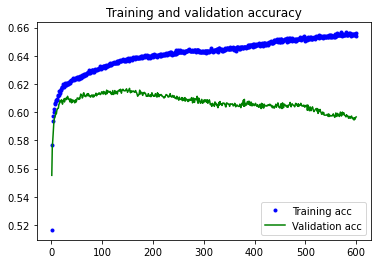

502/502 [==============================] - 0s 568us/step
away win rate =  0.3889650872817955
Train data accuracy 0.64376557
tf.Tensor(
[[6427 2340]
 [3374 3899]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 645us/step
away win rate =  0.3855361596009975
Test data accuracy 0.639601
tf.Tensor(
[[1572  620]
 [ 892  926]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-113314
epoch number = 600, batch_size = 100
structure = [20], learning_rate = 0.001
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
___________________

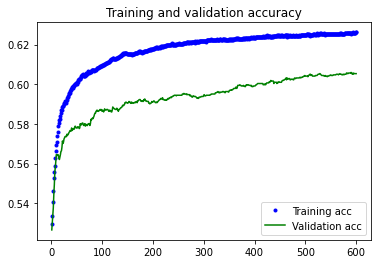

502/502 [==============================] - 0s 575us/step
away win rate =  0.381359102244389
Train data accuracy 0.62206984
tf.Tensor(
[[6314 2453]
 [3609 3664]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 599us/step
away win rate =  0.384788029925187
Test data accuracy 0.62229425
tf.Tensor(
[[1574  618]
 [ 893  925]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-113432
epoch number = 600, batch_size = 100
structure = [20], learning_rate = 0.0001
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                820       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
__________________

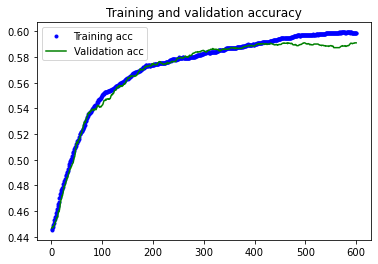

502/502 [==============================] - 0s 562us/step
away win rate =  0.4002493765586035
Train data accuracy 0.5971945
tf.Tensor(
[[5963 2804]
 [3657 3616]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 607us/step
away win rate =  0.40124688279301746
Test data accuracy 0.600399
tf.Tensor(
[[1521  671]
 [ 880  938]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-113550
epoch number = 600, batch_size = 100
structure = [20], learning_rate = 1e-05
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                820       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
___________________

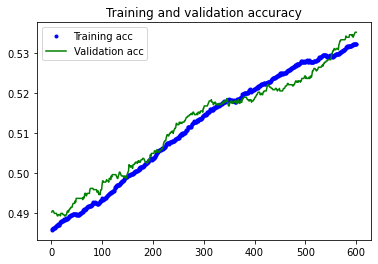

502/502 [==============================] - 0s 537us/step
away win rate =  0.3836658354114713
Train data accuracy 0.53298
tf.Tensor(
[[5581 3186]
 [4305 2968]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 573us/step
away win rate =  0.3713216957605985
Test data accuracy 0.5337656
tf.Tensor(
[[1428  764]
 [1093  725]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-113708
epoch number = 600, batch_size = 100
structure = [20, 10], learning_rate = 0.01
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                820       
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                

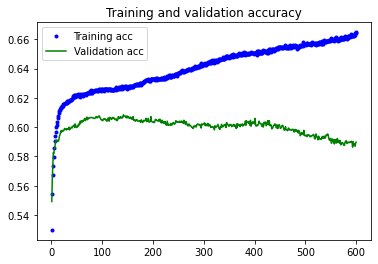

502/502 [==============================] - 0s 542us/step
away win rate =  0.3860349127182045
Train data accuracy 0.6504364
tf.Tensor(
[[6504 2263]
 [3344 3929]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 595us/step
away win rate =  0.3812967581047382
Test data accuracy 0.641596
tf.Tensor(
[[1547  645]
 [ 934  884]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-113831
epoch number = 600, batch_size = 100
structure = [20, 10], learning_rate = 0.001
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                820       
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
              

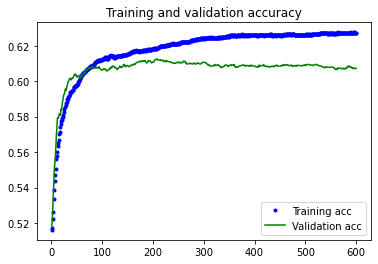

502/502 [==============================] - 0s 558us/step
away win rate =  0.3869700748129676
Train data accuracy 0.6238155
tf.Tensor(
[[6283 2484]
 [3550 3723]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 611us/step
away win rate =  0.3967581047381546
Test data accuracy 0.6237905
tf.Tensor(
[[1551  641]
 [ 868  950]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-113955
epoch number = 600, batch_size = 100
structure = [20, 10], learning_rate = 0.0001
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 20)                820       
                                                                 
 dense_15 (Dense)            (None, 10)                210       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
            

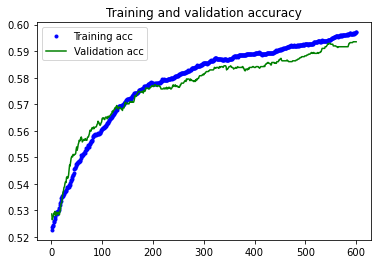

502/502 [==============================] - 0s 557us/step
away win rate =  0.2932044887780549
Train data accuracy 0.59638405
tf.Tensor(
[[6815 1952]
 [4522 2751]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 598us/step
away win rate =  0.29750623441396506
Test data accuracy 0.5961596
tf.Tensor(
[[1693  499]
 [1124  694]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-114116
epoch number = 600, batch_size = 100
structure = [20, 10], learning_rate = 1e-05
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 20)                820       
                                                                 
 dense_18 (Dense)            (None, 10)                210       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
           

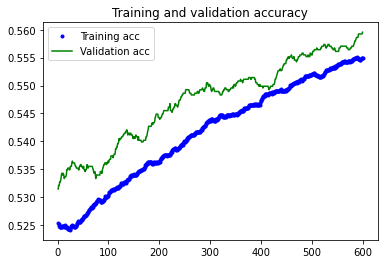

502/502 [==============================] - 0s 544us/step
away win rate =  0.36159600997506236
Train data accuracy 0.555798
tf.Tensor(
[[5941 2826]
 [4299 2974]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 675us/step
away win rate =  0.3576059850374065
Test data accuracy 0.55446386
tf.Tensor(
[[1480  712]
 [1096  722]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-114238
epoch number = 600, batch_size = 100
structure = [20, 10, 30], learning_rate = 0.01
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                820       
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
 dense_22 (Dense)            (None, 30)                330       
         

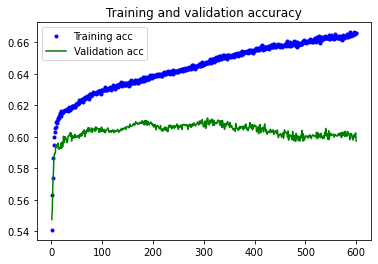

502/502 [==============================] - 0s 561us/step
away win rate =  0.40922693266832916
Train data accuracy 0.6529302
tf.Tensor(
[[6338 2429]
 [3138 4135]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 589us/step
away win rate =  0.4072319201995013
Test data accuracy 0.64349127
tf.Tensor(
[[1494  698]
 [ 883  935]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-114405
epoch number = 600, batch_size = 100
structure = [20, 10, 30], learning_rate = 0.001
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                820       
                                                                 
 dense_25 (Dense)            (None, 10)                210       
                                                                 
 dense_26 (Dense)            (None, 30)                330       
       

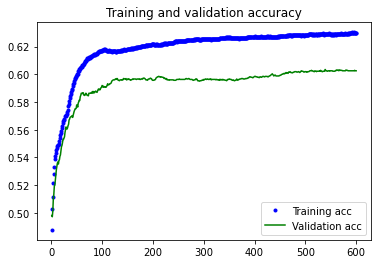

502/502 [==============================] - 0s 562us/step
away win rate =  0.36945137157107233
Train data accuracy 0.6247506
tf.Tensor(
[[6431 2336]
 [3683 3590]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 591us/step
away win rate =  0.3740648379052369
Test data accuracy 0.6242893
tf.Tensor(
[[1594  598]
 [ 916  902]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-114534
epoch number = 600, batch_size = 100
structure = [20, 10, 30], learning_rate = 0.0001
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 20)                820       
                                                                 
 dense_29 (Dense)            (None, 10)                210       
                                                                 
 dense_30 (Dense)            (None, 30)                330       
      

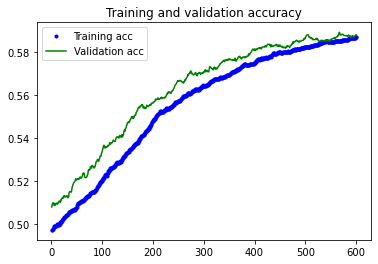

502/502 [==============================] - 0s 569us/step
away win rate =  0.2855361596009975
Train data accuracy 0.5868454
tf.Tensor(
[[6800 1967]
 [4660 2613]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 653us/step
away win rate =  0.2822942643391521
Test data accuracy 0.5876808
tf.Tensor(
[[1715  477]
 [1163  655]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-114702
epoch number = 600, batch_size = 100
structure = [20, 10, 30], learning_rate = 1e-05
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 20)                820       
                                                                 
 dense_33 (Dense)            (None, 10)                210       
                                                                 
 dense_34 (Dense)            (None, 30)                330       
        

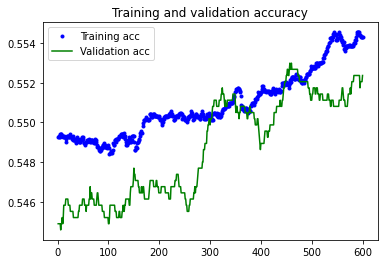

502/502 [==============================] - 0s 583us/step
away win rate =  0.12468827930174564
Train data accuracy 0.55392766
tf.Tensor(
[[7826  941]
 [6214 1059]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 641us/step
away win rate =  0.13541147132169576
Test data accuracy 0.55531174
tf.Tensor(
[[1949  243]
 [1518  300]], shape=(2, 2), dtype=int32)


In [17]:
for s in structures_list:
    for e in epoch_list:
        for l in learning_rate_list:
            model, history = NN_prototype(X_train, 
                                          y_train, 
                                          s, 
                                          epoch = e, 
                                          b_size = 100,
                                          validation_split = 0.2,
                                          learning_rate = l)
            plot_accuracy(model, history, X_test, y_test)
            train_acc, test_acc = train_test_confusionM(X_train, 
                                                        y_train, 
                                                        X_test, 
                                                        y_test,
                                                        verbose = True)

## Dropout NN

In [18]:
structures_list = [[20], [20,10], [20,10,30]]
epoch_list = np.array([600])
learning_rate_list = np.array([0.01,0.001,0.0001])




Now working with: logs/NN/20220603-114830
epoch number = 600, batch_size = 100
structure = [20], learning_rate = 0.01
drop_rate = 0.2
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 20)                820       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                 21        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


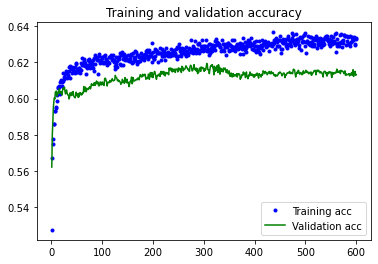

502/502 [==============================] - 0s 569us/step
away win rate =  0.3733790523690773
Train data accuracy 0.6319202
tf.Tensor(
[[6457 2310]
 [3594 3679]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 571us/step
away win rate =  0.3743142144638404
Test data accuracy 0.63107234
tf.Tensor(
[[1604  588]
 [ 905  913]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-114952
epoch number = 600, batch_size = 100
structure = [20], learning_rate = 0.001
drop_rate = 0.2
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 21        

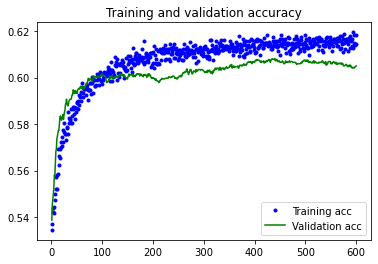

502/502 [==============================] - 0s 611us/step
away win rate =  0.36614713216957606
Train data accuracy 0.6159601
tf.Tensor(
[[6387 2380]
 [3780 3493]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 651us/step
away win rate =  0.37605985037406486
Test data accuracy 0.6177556
tf.Tensor(
[[1595  597]
 [ 907  911]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-115120
epoch number = 600, batch_size = 100
structure = [20], learning_rate = 0.0001
drop_rate = 0.2
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 20)                820       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_41 (Dense)            (None, 1)                 21      

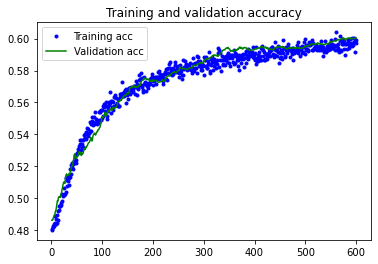

502/502 [==============================] - 0s 542us/step
away win rate =  0.35629675810473815
Train data accuracy 0.6064838
tf.Tensor(
[[6390 2377]
 [3935 3338]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 718us/step
away win rate =  0.3516209476309227
Test data accuracy 0.6073815
tf.Tensor(
[[1616  576]
 [ 984  834]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-115248
epoch number = 600, batch_size = 100
structure = [20, 10], learning_rate = 0.01
drop_rate = 0.2
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 20)                820       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_43 (Dense)            (None, 10)                210    

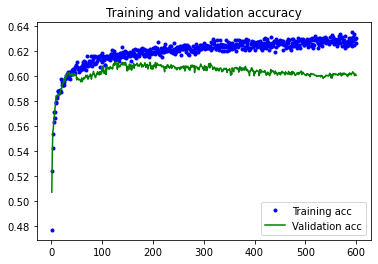

502/502 [==============================] - 0s 572us/step
away win rate =  0.3537406483790524
Train data accuracy 0.63273066
tf.Tensor(
[[6621 2146]
 [3745 3528]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 573us/step
away win rate =  0.3618453865336658
Test data accuracy 0.63142145
tf.Tensor(
[[1626  566]
 [ 933  885]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-115418
epoch number = 600, batch_size = 100
structure = [20, 10], learning_rate = 0.001
drop_rate = 0.2
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 20)                820       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_46 (Dense)            (None, 10)                210  

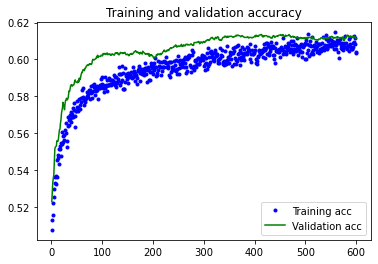

502/502 [==============================] - 0s 625us/step
away win rate =  0.3566708229426434
Train data accuracy 0.61558604
tf.Tensor(
[[6460 2307]
 [3859 3414]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 565us/step
away win rate =  0.3610972568578554
Test data accuracy 0.6168578
tf.Tensor(
[[1619  573]
 [ 943  875]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-115544
epoch number = 600, batch_size = 100
structure = [20, 10], learning_rate = 0.0001
drop_rate = 0.2
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 20)                820       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_49 (Dense)            (None, 10)                210  

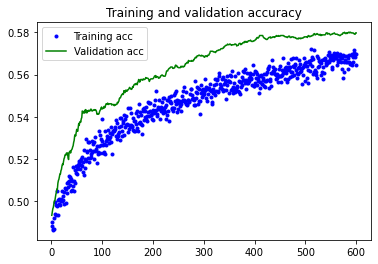

502/502 [==============================] - 0s 556us/step
away win rate =  0.25835411471321695
Train data accuracy 0.5774938
tf.Tensor(
[[6943 1824]
 [4953 2320]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 581us/step
away win rate =  0.2546134663341646
Test data accuracy 0.5771571
tf.Tensor(
[[1740  452]
 [1249  569]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-115711
epoch number = 600, batch_size = 100
structure = [20, 10, 30], learning_rate = 0.01
drop_rate = 0.2
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 20)                820       
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_52 (Dense)            (None, 10)                210

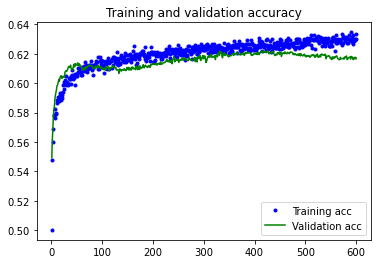

502/502 [==============================] - 0s 563us/step
away win rate =  0.34869077306733165
Train data accuracy 0.63366586
tf.Tensor(
[[6669 2098]
 [3778 3495]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 605us/step
away win rate =  0.34663341645885287
Test data accuracy 0.6335162
tf.Tensor(
[[1670  522]
 [ 950  868]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-115845
epoch number = 600, batch_size = 100
structure = [20, 10, 30], learning_rate = 0.001
drop_rate = 0.2
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 20)                820       
                                                                 
 dropout_12 (Dropout)        (None, 20)                0         
                                                                 
 dense_56 (Dense)            (None, 10)                

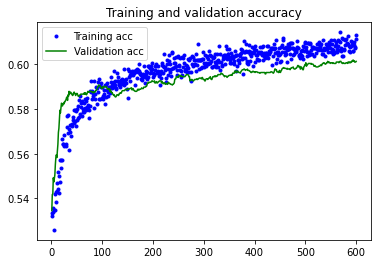

502/502 [==============================] - 0s 660us/step
away win rate =  0.35211970074812965
Train data accuracy 0.61415213
tf.Tensor(
[[6485 2282]
 [3907 3366]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 644us/step
away win rate =  0.3531172069825436
Test data accuracy 0.61511225
tf.Tensor(
[[1629  563]
 [ 965  853]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-120021
epoch number = 600, batch_size = 100
structure = [20, 10, 30], learning_rate = 0.0001
drop_rate = 0.2
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 20)                820       
                                                                 
 dropout_15 (Dropout)        (None, 20)                0         
                                                                 
 dense_60 (Dense)            (None, 10)               

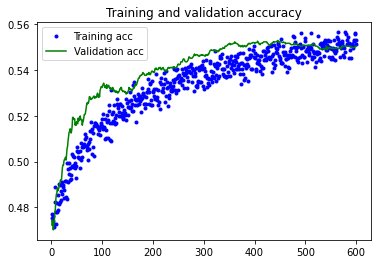

502/502 [==============================] - 0s 577us/step
away win rate =  0.09320448877805486
Train data accuracy 0.5598504
tf.Tensor(
[[8126  641]
 [6419  854]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 677us/step
away win rate =  0.09002493765586035
Test data accuracy 0.56164587
tf.Tensor(
[[2056  136]
 [1593  225]], shape=(2, 2), dtype=int32)


In [19]:
for s in structures_list:
    for e in epoch_list:
        for l in learning_rate_list:
            model, history = NN_prototype(X_train, 
                                          y_train, 
                                          s, 
                                          epoch = e, 
                                          b_size = 100,
                                          validation_split = 0.2,
                                          learning_rate = l,
                                          drop_rate = 0.2)
            plot_accuracy(model, history, X_test, y_test)
            train_acc, test_acc = train_test_confusionM(X_train, 
                                                        y_train, 
                                                        X_test, 
                                                        y_test,
                                                        verbose = True)

# considering learning_rate = 0.01
#### with dropout

In [20]:
structures_list = [[20,10,30],[20,10,20,5]]
epoch_list = np.array([1000])
learning_rate_list = np.array([0.01])




Now working with: logs/NN/20220603-122129
epoch number = 1000, batch_size = 100
structure = [20, 10, 30], learning_rate = 0.01
drop_rate = 0.2
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 20)                820       
                                                                 
 dropout_18 (Dropout)        (None, 20)                0         
                                                                 
 dense_73 (Dense)            (None, 10)                210       
                                                                 
 dropout_19 (Dropout)        (None, 10)                0         
                                                                 
 dense_74 (Dense)            (None, 30)                330       
                                                                 
 dropout_20 (Dropout)        (None, 30)

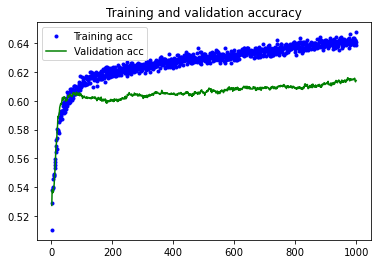

502/502 [==============================] - 0s 556us/step
away win rate =  0.3675810473815461
Train data accuracy 0.6471945
tf.Tensor(
[[6626 2141]
 [3518 3755]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 628us/step
away win rate =  0.37256857855361597
Test data accuracy 0.64314216
tf.Tensor(
[[1606  586]
 [ 910  908]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-122409
epoch number = 1000, batch_size = 100
structure = [20, 10, 20, 5], learning_rate = 0.01
drop_rate = 0.2
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 20)                820       
                                                                 
 dropout_21 (Dropout)        (None, 20)                0         
                                                                 
 dense_77 (Dense)            (None, 10)              

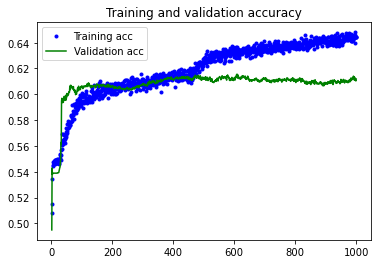

502/502 [==============================] - 0s 620us/step
away win rate =  0.3059850374064838
Train data accuracy 0.64881545
tf.Tensor(
[[7133 1634]
 [3999 3274]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 616us/step
away win rate =  0.314214463840399
Test data accuracy 0.6426434
tf.Tensor(
[[1705  487]
 [1045  773]], shape=(2, 2), dtype=int32)


In [22]:
for s in structures_list:
    for e in epoch_list:
        for l in learning_rate_list:
            model, history = NN_prototype(X_train, 
                                          y_train, 
                                          s, 
                                          epoch = e, 
                                          b_size = 100,
                                          validation_split = 0.2,
                                          drop_rate = 0.2,
                                          learning_rate = l)
            plot_accuracy(model, history, X_test, y_test)
            train_acc, test_acc = train_test_confusionM(X_train, 
                                                        y_train, 
                                                        X_test, 
                                                        y_test,
                                                        verbose = True)




Now working with: logs/NN/20220603-122836
epoch number = 1000, batch_size = 100
structure = [20], learning_rate = 0.01
drop_rate = 0.2
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 20)                820       
                                                                 
 dropout_25 (Dropout)        (None, 20)                0         
                                                                 
 dense_82 (Dense)            (None, 1)                 21        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


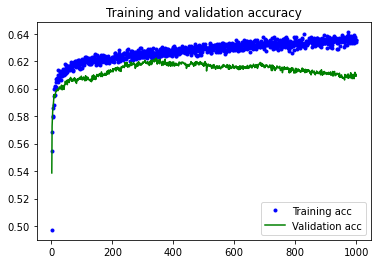

502/502 [==============================] - 0s 576us/step
away win rate =  0.3766209476309227
Train data accuracy 0.6331671
tf.Tensor(
[[6441 2326]
 [3558 3715]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 682us/step
away win rate =  0.37032418952618457
Test data accuracy 0.6318703
tf.Tensor(
[[1610  582]
 [ 915  903]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-123054
epoch number = 1000, batch_size = 100
structure = [10], learning_rate = 0.01
drop_rate = 0.2
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 10)                410       
                                                                 
 dropout_26 (Dropout)        (None, 10)                0         
                                                                 
 dense_84 (Dense)            (None, 1)                 11        

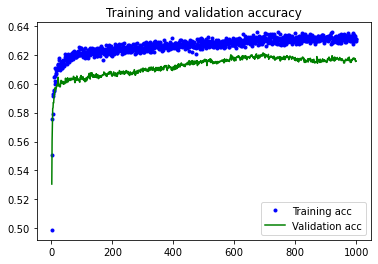

502/502 [==============================] - 0s 597us/step
away win rate =  0.368142144638404
Train data accuracy 0.63241893
tf.Tensor(
[[6503 2264]
 [3632 3641]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 595us/step
away win rate =  0.3743142144638404
Test data accuracy 0.63177055
tf.Tensor(
[[1607  585]
 [ 902  916]], shape=(2, 2), dtype=int32)


In [23]:
structures_list = [[20],[10]]
epoch_list = np.array([1000])
learning_rate_list = np.array([0.01])

for s in structures_list:
    for e in epoch_list:
        for l in learning_rate_list:
            model, history = NN_prototype(X_train, 
                                          y_train, 
                                          s, 
                                          epoch = e, 
                                          b_size = 100,
                                          validation_split = 0.2,
                                          drop_rate = 0.2,
                                          learning_rate = l)
            plot_accuracy(model, history, X_test, y_test)
            train_acc, test_acc = train_test_confusionM(X_train, 
                                                        y_train, 
                                                        X_test, 
                                                        y_test,
                                                        verbose = True)




Now working with: logs/NN/20220603-124230
epoch number = 1000, batch_size = 100
structure = [20, 10], learning_rate = 0.01
drop_rate = 0.2
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 20)                820       
                                                                 
 dropout_30 (Dropout)        (None, 20)                0         
                                                                 
 dense_91 (Dense)            (None, 10)                210       
                                                                 
 dropout_31 (Dropout)        (None, 10)                0         
                                                                 
 dense_92 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,041
Trainable params: 1,041

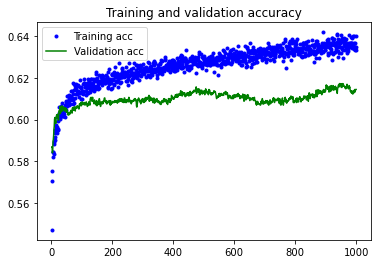

502/502 [==============================] - 0s 656us/step
away win rate =  0.3678927680798005
Train data accuracy 0.6412718
tf.Tensor(
[[6576 2191]
 [3563 3710]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 674us/step
away win rate =  0.3680798004987531
Test data accuracy 0.63780546
tf.Tensor(
[[1609  583]
 [ 925  893]], shape=(2, 2), dtype=int32)



Now working with: logs/NN/20220603-124456
epoch number = 1000, batch_size = 100
structure = [10, 5], learning_rate = 0.01
drop_rate = 0.2
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 10)                410       
                                                                 
 dropout_32 (Dropout)        (None, 10)                0         
                                                                 
 dense_94 (Dense)            (None, 5)                 55     

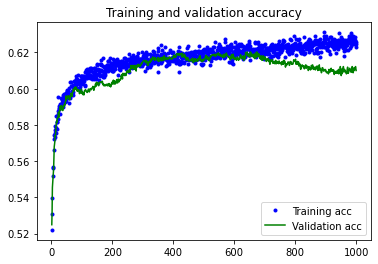

502/502 [==============================] - 0s 616us/step
away win rate =  0.3635286783042394
Train data accuracy 0.6309227
tf.Tensor(
[[6528 2239]
 [3681 3592]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 612us/step
away win rate =  0.3653366583541147
Test data accuracy 0.62897754
tf.Tensor(
[[1609  583]
 [ 936  882]], shape=(2, 2), dtype=int32)


In [25]:
structures_list = [[20,10],[10, 5]]
epoch_list = np.array([1000])
learning_rate_list = np.array([0.01])

for s in structures_list:
    for e in epoch_list:
        for l in learning_rate_list:
            model, history = NN_prototype(X_train, 
                                          y_train, 
                                          s, 
                                          epoch = e, 
                                          b_size = 100,
                                          validation_split = 0.2,
                                          drop_rate = 0.2,
                                          learning_rate = l)
            plot_accuracy(model, history, X_test, y_test)
            train_acc, test_acc = train_test_confusionM(X_train, 
                                                        y_train, 
                                                        X_test, 
                                                        y_test,
                                                        verbose = True)




Now working with: logs/NN/20220603-130251
epoch number = 600, batch_size = 100
structure = [10, 5], learning_rate = 0.01
drop_rate = 0.2
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 10)                410       
                                                                 
 dropout_36 (Dropout)        (None, 10)                0         
                                                                 
 dense_100 (Dense)           (None, 5)                 55        
                                                                 
 dropout_37 (Dropout)        (None, 5)                 0         
                                                                 
 dense_101 (Dense)           (None, 1)                 6         
                                                                 
Total params: 471
Trainable params: 471
Non-t

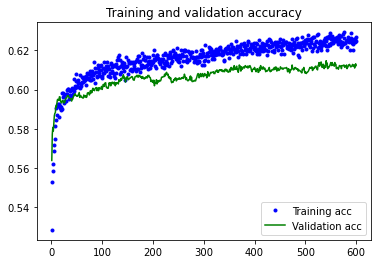

502/502 [==============================] - 0s 589us/step
away win rate =  0.3576683291770574
Train data accuracy 0.6296758
tf.Tensor(
[[6565 2202]
 [3738 3535]], shape=(2, 2), dtype=int32)
126/126 [==============================] - 0s 835us/step
away win rate =  0.3618453865336658
Test data accuracy 0.6286783
tf.Tensor(
[[1623  569]
 [ 936  882]], shape=(2, 2), dtype=int32)


In [27]:
structures_list = [[10, 5]]
epoch_list = np.array([600])
learning_rate_list = np.array([0.01])

for s in structures_list:
    for e in epoch_list:
        for l in learning_rate_list:
            model, history = NN_prototype(X_train, 
                                          y_train, 
                                          s, 
                                          epoch = e, 
                                          b_size = 100,
                                          validation_split = 0.2,
                                          drop_rate = 0.2,
                                          learning_rate = l)
            plot_accuracy(model, history, X_train, y_train)
            train_acc, test_acc = train_test_confusionM(X_train, 
                                                        y_train, 
                                                        X_test, 
                                                        y_test,
                                                        verbose = True)